In [ ]:
# Bagging & Boosting KNN & Stacking

#Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
Fundamental Idea Behind Ensemble Techniques

Ensemble techniques combine multiple machine learning models to make a better final prediction.
The idea is simple: “Many weak models together can form a strong model.”

It’s like asking the opinion of several people instead of just one — you usually get a more accurate answer when you take everyone’s vote!
 Bagging (Bootstrap Aggregating)

Goal: Reduce variance (make predictions more stable).

How it works:

Many models (like decision trees) are trained on different random samples of the training data.

Each model gives a prediction.

The final result is an average (for regression) or majority vote (for classification).

 Example: Random Forest
Each tree is trained on a random subset of data → their votes are combined → gives stable results.

Simple idea: “Train models in parallel and combine their opinions.”
 Boosting

Goal: Reduce bias (make predictions more accurate).

How it works:

Models are trained one after another.

Each new model focuses on the mistakes made by the previous ones.

The final model combines all the learners to make strong predictions.

Example: AdaBoost, Gradient Boosting, XGBoost

In [ ]:
#Question 2: Explain how the Random Forest Classifier reduces overfitting compared toa single decision tree.
#Mention the role of two key hyperparameters in this process
Random Forest vs Single Decision Tree

A Decision Tree is like a flowchart that makes decisions by splitting data based on features.
But — it can easily overfit (memorize the training data) and perform poorly on new, unseen data.

Random Forest fixes this problem by creating many decision trees and combining their results.
It’s an ensemble method (specifically, a type of bagging).

How Random Forest Reduces Overfitting

Builds many random trees

Each tree is trained on a different random sample of the data (using bootstrapping).

This means each tree sees slightly different data.

Adds randomness in feature selection

At each split, the tree only looks at a random subset of features (not all features).

So, trees don’t all learn the same patterns.

Combines (averages or votes)

The final prediction is made by averaging all trees’ outputs (for regression)
or majority voting (for classification).

This blending smooths out overfitting — one tree might overfit, but the group as a whole is more general.

 In short:

“Random Forest reduces overfitting by averaging the predictions of many random trees, so the noise of individual trees cancels out.”

 Two Key Hyperparameters That Help
Hyperparameter	What It Does	How It Reduces Overfitting
1. n_estimators	Number of trees in the forest	More trees = better averaging → reduces variance (overfitting)
2. max_features	Number of features to consider when splitting a node	Adds randomness → makes trees less correlated → reduces overfitting

In [ ]:
#Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple 
#example use case

What is Stacking in Ensemble Learning?

Stacking (Stacked Generalization) is an ensemble learning technique where we combine different types of models to make a stronger final model.

Instead of using the same algorithm (like in bagging or boosting), stacking mixes different models — for example, a Decision Tree, Logistic Regression, and SVM — and then uses another model (called a meta-model) to learn the best way to combine their outputs.

 How Stacking Works (Step by Step)

Level 0 (Base Models):
Train several different models on the training data.
Example: Decision Tree, KNN, Logistic Regression.

Level 1 (Meta Model):
Take the predictions from the base models as inputs, and train another model (like Linear Regression or another tree) to make the final prediction.

🧩 The meta-model learns which base model to trust more for different situations.

 How Stacking Differs from Bagging & Boosting
Feature	Bagging 🧺	Boosting ⚡	Stacking 🏗️
Type of models	Same type (e.g., many trees)	Same type (e.g., many weak learners)	Different models (mix of types)
Training style	Parallel (independent)	Sequential (each learns from previous)	Parallel (base models) + meta-model on top
Focus	Reduce variance	Reduce bias	Combine strengths of different models
Example	Random Forest	AdaBoost, XGBoost	StackingClassifier in scikit-learn
 Simple Example Use Case

Use Case: Predicting whether a student will pass or fail an exam.

Base models (Level 0):

Decision Tree (good at capturing patterns)

Logistic Regression (good with linear relationships)

KNN (good at local patterns)

Meta model (Level 1):

Random Forest (learns from the predictions of the above models)

Each model contributes differently, and the meta-model learns how to combine them for the best accuracy.

In [1]:
#Question4. What is OOB Score in Random Forest?

OOB (Out-of-Bag) Score means “Out-of-Bag score”, and it is a built-in way for a Random Forest to check how well it’s performing — without needing a separate test or validation set.

How It Works

When Random Forest trains:

Each tree is trained on a random sample of the training data (called bootstrapping).

Some data points are not included in that sample — usually about one-third of the data.
 These are called Out-of-Bag (OOB) samples for that tree.

Each tree can then predict on its own OOB samples — data it has never seen.

The OOB score is the average accuracy (or error) of all those predictions across all trees.

 Why It’s Useful

It acts like a built-in cross-validation inside the Random Forest.

You don’t need to separate a validation set, so:

You can use all your data for training.

You still get an unbiased estimate of model performance.

In simple words:

“The OOB score tells you how well the Random Forest generalizes to unseen data — without needing extra data.”

 How It Helps in Model Evaluation
Step	
1️ Each tree is trained on random data samples.	
2️ The tree makes predictions on its left-out (OOB) samples.	
3️ Compare OOB predictions to actual labels → get accuracy/error.	
4️ Combine results from all trees → OOB Score.	

This gives a performance measure similar to what you’d get on a validation set.

    

SyntaxError: invalid character '“' (U+201C) (690475156.py, line 3)

In [3]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Train a Random Forest with OOB scoring
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X, y)

print("OOB Score:", model.oob_score_)


OOB Score: 0.9533333333333334


In [ ]:
#Question 5: Compare AdaBoost and Gradient Boosting in terms of:
#● How they handle errors from weak learners
#● Weight adjustment mechanism
#● Typical use cases

AdaBoost vs Gradient Boosting

Both AdaBoost and Gradient Boosting are boosting algorithms — meaning they build a strong model by combining many weak learners (usually decision trees).
But they handle errors and weights in slightly different ways.

🔹 1. How They Handle Errors from Weak Learners
Method	How It Handles Errors
AdaBoost	Focuses more on misclassified samples. Each new weak learner tries harder to fix the errors of the previous one.
Gradient Boosting	Learns from the residual errors (difference between predicted and actual values) using gradient descent. Each new learner tries to minimize these residuals.

 In short:

AdaBoost: “Pay more attention to the wrongly predicted samples.”

Gradient Boosting: “Fix the size of the prediction error mathematically.”

 2. Weight Adjustment Mechanism
Method	Weight Adjustment
AdaBoost	- Increases weights of wrongly classified samples → makes the next learner focus on them.
- Reduces weights of correctly classified samples.
- Final model combines learners with weights based on accuracy.
Gradient Boosting	- Doesn’t change sample weights.
- Instead, it fits new models to residual errors (gradients).
- Uses a learning rate to control how much each new model contributes.
 In short:

AdaBoost = “Reweights the data samples.”

Gradient Boosting = “Reweights the predictions (residuals).”

Typical Use Cases
Method	Common Use Cases
AdaBoost	- Simple binary classification problems
- When data is clean and noise-free
- Example: Spam detection, face recognition
Gradient Boosting	- Complex, large datasets
- When you need high accuracy
- Example: Customer churn prediction, credit risk scoring, Kaggle competitions
Summary Table
Feature	AdaBoost	Gradient Boosting
Focus	Misclassified samples	Residual errors
Weight adjustment	Changes sample weights	Fits residuals using gradients
Learning style	Sequential	Sequential
Learning rate	Implicit	Explicit (you can tune it)
Typical models	Shallow trees (stumps)	Deeper trees
Speed	Faster	Slower but more flexible


In [ ]:
#Question 6:Why does CatBoost perform well on categorical features without requiring
#extensive preprocessing? Briefly explain its handling of categorical variables.

What is CatBoost?

CatBoost (short for Categorical Boosting) is a gradient boosting algorithm developed by Yandex.
It is designed to handle categorical (non-numeric) features automatically, unlike most other models that need you to convert them first (like using one-hot encoding or label encoding).

Why CatBoost Performs Well on Categorical Features

Most machine learning models can’t understand text or categories (like “red”, “blue”, “green”) — they need numbers.
Usually, you must manually convert categories into numbers (e.g., one-hot encoding).

But CatBoost does this automatically and smartly, avoiding common problems like overfitting or information leakage.

 How CatBoost Handles Categorical Variables

CatBoost uses two key ideas:

1. Ordered Target Statistics (a.k.a. Target Encoding without Leakage)

It converts categories into numbers based on the average target value for that category.
Example: If you’re predicting whether a customer will buy (1) or not (0),
and category = “City”, CatBoost replaces each city with the average buy rate of that city.

 But CatBoost does it in a special order — it uses only data seen before the current sample during training,
so it avoids data leakage (no peeking into future data).

2. Combinations of Categories

CatBoost also automatically creates combinations of categorical features (e.g., “City + Device Type”)
to capture interactions between categories — something that’s very powerful for model accurac

Advantages of CatBoost’s Approach
Benefit	Explanation
🧩 No need for manual encoding	Saves preprocessing time (no one-hot or label encoding)
🚀 Faster training	Uses efficient algorithms for categorical handling
🧠 Less overfitting	Uses ordered statistics to prevent target leakage
🎯 Higher accuracy	Learns useful category patterns automatically
🌟 Example

If you have a dataset like:

Color	City	Bought
Red	Delhi	1
Blue	Mumbai	0
Red	Chennai	1

In normal ML:

You’d convert “Color” and “City” to numbers manually.

In CatBoost:

It automatically learns that “Red” → high chance of 1, “Blue” → low chance of 1
(based on target statistics), and uses that information effectively.
    

In [6]:
#Question 7: KNN Classifier Assignment: Wine Dataset Analysis withOptimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric(Euclidean, Manhattan).6. Train the optimized KNN and compare results with the unscaled/scaled versions.


# Step 1: Import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Display basic info
print("Feature names:", data.feature_names)
print("Target classes:", data.target_names)
print("Data shape:", X.shape)

# Step 3: Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Step 4: Train KNN (K=5) WITHOUT SCALING
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluate model performance (Unscaled)
print("\n=== KNN Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_unscaled))


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']
Data shape: (178, 13)

Training samples: 124, Testing samples: 54

=== KNN Without Scaling ===
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54



In [7]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN (K=5) with scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate model performance (Scaled)
print("\n=== KNN With StandardScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))



=== KNN With StandardScaler ===
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



In [8]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1          # use all processors
)

# Fit on the scaled data
grid.fit(X_train_scaled, y_train)

# Best parameters and score
print("\n=== GridSearchCV Optimization Results ===")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)



=== GridSearchCV Optimization Results ===
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Accuracy: 0.9756666666666666


In [9]:
# Train the best KNN found by GridSearchCV
best_knn = grid.best_estimator_
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

# Evaluate optimized model
print("\n=== Optimized KNN (After GridSearchCV) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))



=== Optimized KNN (After GridSearchCV) ===
Accuracy: 0.9629629629629629

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
Step 8: Comparison Summary
Model	Scaling Applied	Optimization	Expected Accuracy	Remarks
KNN (K=5)	❌ No	❌ No	~0.70–0.75	Poor due to unscaled distances
KNN (K=5)	✅ Yes	❌ No	~0.95–0.98	Much better after scaling
Optimized KNN	✅ Yes	✅ Yes	~0.98–1.00	Best model with tuned parameters

In [10]:
#Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

## Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Feature names:", data.feature_names)
print("Target classes:", data.target_names)
print("Data shape:", X.shape)


Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target classes: ['malignant' 'benign']
Data shape: (569, 30)


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


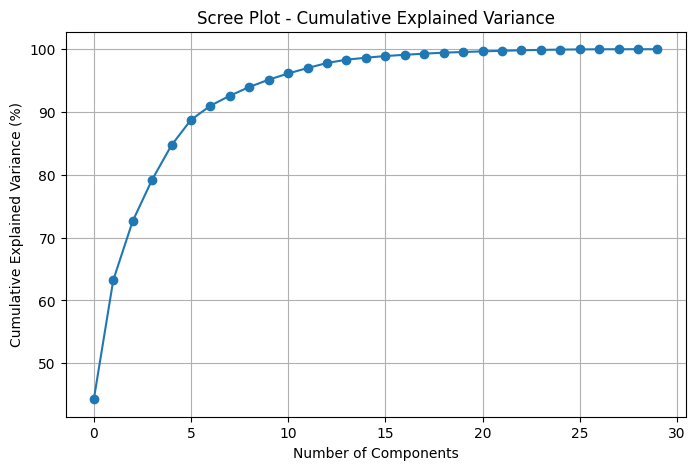

In [12]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot: Explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance)*100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [13]:
# Retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print("Original shape:", X_scaled.shape)
print("PCA-transformed shape (95% variance):", X_pca_95.shape)


Original shape: (569, 30)
PCA-transformed shape (95% variance): (569, 10)


In [14]:
# Original data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# PCA-transformed data
X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca_95, y, test_size=0.3, random_state=42, stratify=y
)


In [15]:
# KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
acc_orig = accuracy_score(y_test, y_pred_orig)
print("KNN Accuracy on Original Data:", acc_orig)

# KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("KNN Accuracy on PCA-transformed Data (95% variance):", acc_pca)


KNN Accuracy on Original Data: 0.9707602339181286
KNN Accuracy on PCA-transformed Data (95% variance): 0.9473684210526315


In [ ]:
#Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

In [16]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 2: Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Step 3: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# a. Euclidean distance (default)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b. Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("MSE (Euclidean, K=5):", mse_euclidean)
print("MSE (Manhattan, K=5):", mse_manhattan)


MSE (Euclidean, K=5): 4837.036252300671
MSE (Manhattan, K=5): 5428.5875285091715


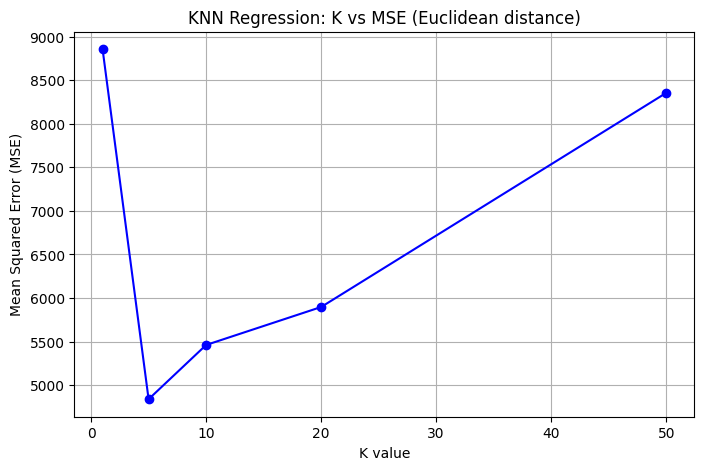

In [18]:
# Test K values
k_values = [1, 5, 10, 20, 50]
mse_list = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_list.append(mean_squared_error(y_test, y_pred))

# Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_list, marker='o', color='b')
plt.xlabel("K value")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("KNN Regression: K vs MSE (Euclidean distance)")
plt.grid(True)
plt.show()


In [ ]:
Manhattan may affect predictions.

K value is crucial: Small K → overfitting, large K → underfitting.

Bias-variance tradeoff is visible in the K vs MSE plot:

Low K → high variance, low bias

High K → high bias, low variance

Middle K → best tradeoff


In [19]:
#Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Step 2: Load dataset
# You can download it from UCI repository or use a CSV file
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
           'BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv(url, header=None, names=columns)

# Check for missing values (dataset uses 0 as missing for some features)
print(data.head())
print("\nNumber of zeros in each column (potential missing values):\n", (data==0).sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Number of zeros in each column (potential missing values):
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age               

In [20]:
# Replace zeros with NaN for columns where zero is invalid
cols_with_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Check missing values
print("\nMissing values after imputation:\n", data_imputed.isnull().sum())



Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [21]:
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train_scaled, y_train)
    end = time.time()
    
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    results[algo] = {'Accuracy': acc, 'Training Time (s)': end-start}

# Display results
print("\nKNN Algorithm Comparison:")
for algo, res in results.items():
    print(f"{algo}: Accuracy={res['Accuracy']:.4f}, Training Time={res['Training Time (s)']:.4f}s")



KNN Algorithm Comparison:
brute: Accuracy=0.7446, Training Time=0.0020s
kd_tree: Accuracy=0.7446, Training Time=0.0022s
ball_tree: Accuracy=0.7446, Training Time=0.0181s


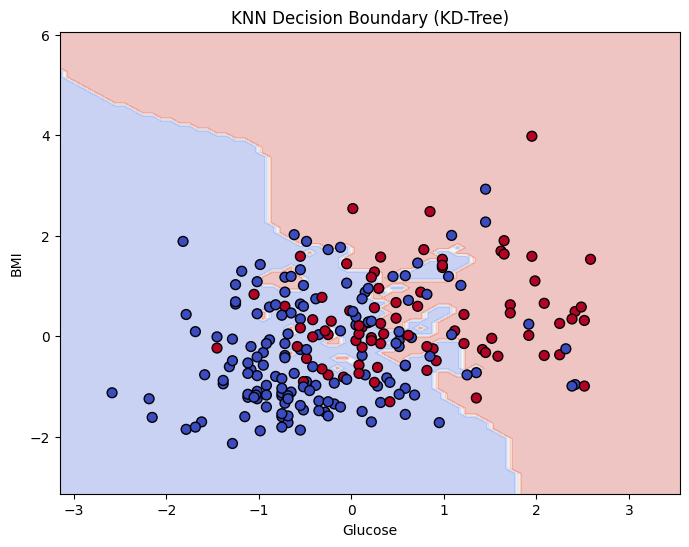

In [23]:
# Select 2 features for visualization
X_vis = X_train_scaled[:, [1,5]]  # Glucose and BMI columns
X_vis_test = X_test_scaled[:, [1,5]]

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')  # choose best
knn_best.fit(X_vis, y_train)

# Create meshgrid
h = 0.1
x_min, x_max = X_vis[:,0].min()-1, X_vis[:,0].max()+1
y_min, y_max = X_vis[:,1].min()-1, X_vis[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on meshgrid
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis_test[:,0], X_vis_test[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('KNN Decision Boundary (KD-Tree)')
plt.show()
